In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import axes
import seaborn as sns

# Cargar el conjunto de datos
df = pd.read_csv('C:\\Users\\Rubén\\Documents\\DATA ANALIST\\git\\TareasEBACmx\\Practica m43//Analista de Datos M43 - Housing.csv')

# Mostrar las dimensiones del DataFrame y las primeras 5 filas
print("Dimensiones del DataFrame (filas, columnas):", df.shape)
print("\nPrimeras 5 filas:")
df.sample(5)

Dimensiones del DataFrame (filas, columnas): (545, 13)

Primeras 5 filas:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
506,2604000,2910,2,1,1,no,no,no,no,no,0,no,unfurnished
479,2940000,3660,4,1,2,no,no,no,no,no,0,no,unfurnished
374,3640000,3520,2,2,1,yes,no,yes,no,no,0,no,semi-furnished
291,4200000,2953,3,1,2,yes,no,yes,no,yes,0,no,unfurnished
171,5250000,10269,3,1,1,yes,no,no,no,no,1,yes,semi-furnished


In [73]:
# Información general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [74]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [75]:
# ¿Dónde están los agujeros? (Valores nulos)
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [76]:
# Porcentaje de datos nulos en el DataFrame
total_celdas = np.product(df.shape)
total_nulos = df.isnull().sum().sum()
porcentaje_nulos = (total_nulos / total_celdas) * 100
print(f"Porcentaje de datos nulos en el DataFrame: {porcentaje_nulos:.2f}%")

Porcentaje de datos nulos en el DataFrame: 0.00%


In [77]:
# Valores no unicos en cada columna
df.nunique().sort_values()

mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
prefarea              2
furnishingstatus      3
bathrooms             4
stories               4
parking               4
bedrooms              6
price               219
area                284
dtype: int64

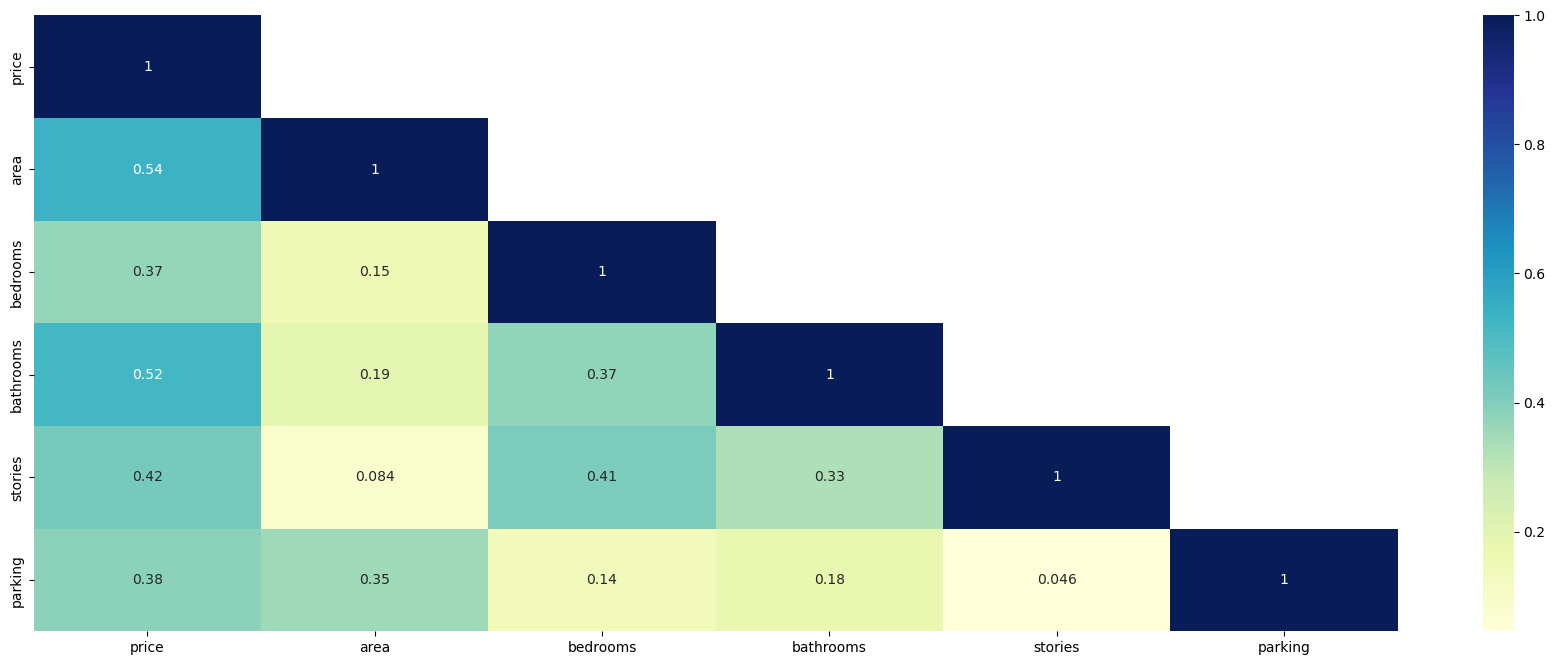

In [78]:
# Gráfica de correlación
plt.figure(figsize=(22, 8))
numeric_df = df.select_dtypes(include=[np.number])
corr_df = numeric_df.corr(method='pearson')
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(bool))
hmap=sns.heatmap(df_lt, cmap='YlGnBu', annot=True)
plt.show()

In [79]:
numeric_df.corr().style.background_gradient(cmap='coolwarm').set_properties(**{'font-size': '10pt'})

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


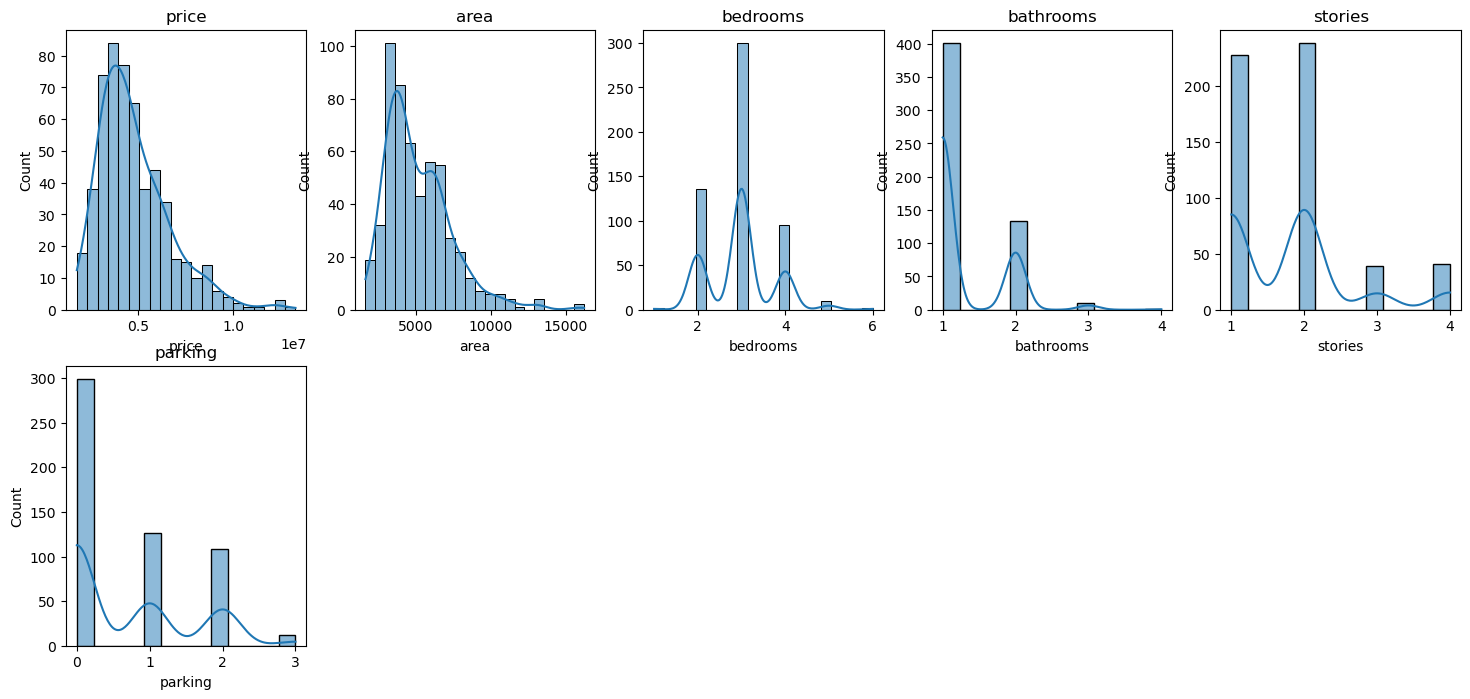

In [80]:
# Grafica exploratoria de todas las columnas numéricas (ajustado para cualquier cantidad de columnas)
numeric_cols = df.select_dtypes(include=[np.number]).columns
n_cols = 5 # Número de columnas por fila en la gráfica
n_rows = int(np.ceil(len(numeric_cols) / n_cols))
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()  # Aplanar para fácil indexado

for i, column in enumerate(numeric_cols):
    sns.histplot(df[column], ax=axes[i], kde=True)
    axes[i].set_title(column)

# Si hay más subplots que columnas, ocultar los ejes vacíos
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.show()

In [81]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [82]:
# Limpieza de datos en un df nuevo, la columna "mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea" son categóricas binarias (yes/no)
df2 = df.copy()
# Convertir columnas binarias (yes/no) a 0/1 usando un ciclo for
binary_cols = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]
for col in binary_cols:
    df2[col] = df2[col].map({"yes": 1, "no": 0})

df2.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [83]:
# Generar variables transformadas logarítmicamente para variables que tienen sesgo alto

for col in df2.columns:
   numeric_cols = df2.select_dtypes(include=[np.number]).columns
   for col in numeric_cols:
      if col.endswith('_log'):  # evitar duplicados si ya existen columnas _log
         continue
      df2[f'{col}_log'] = np.log1p(df2[col])

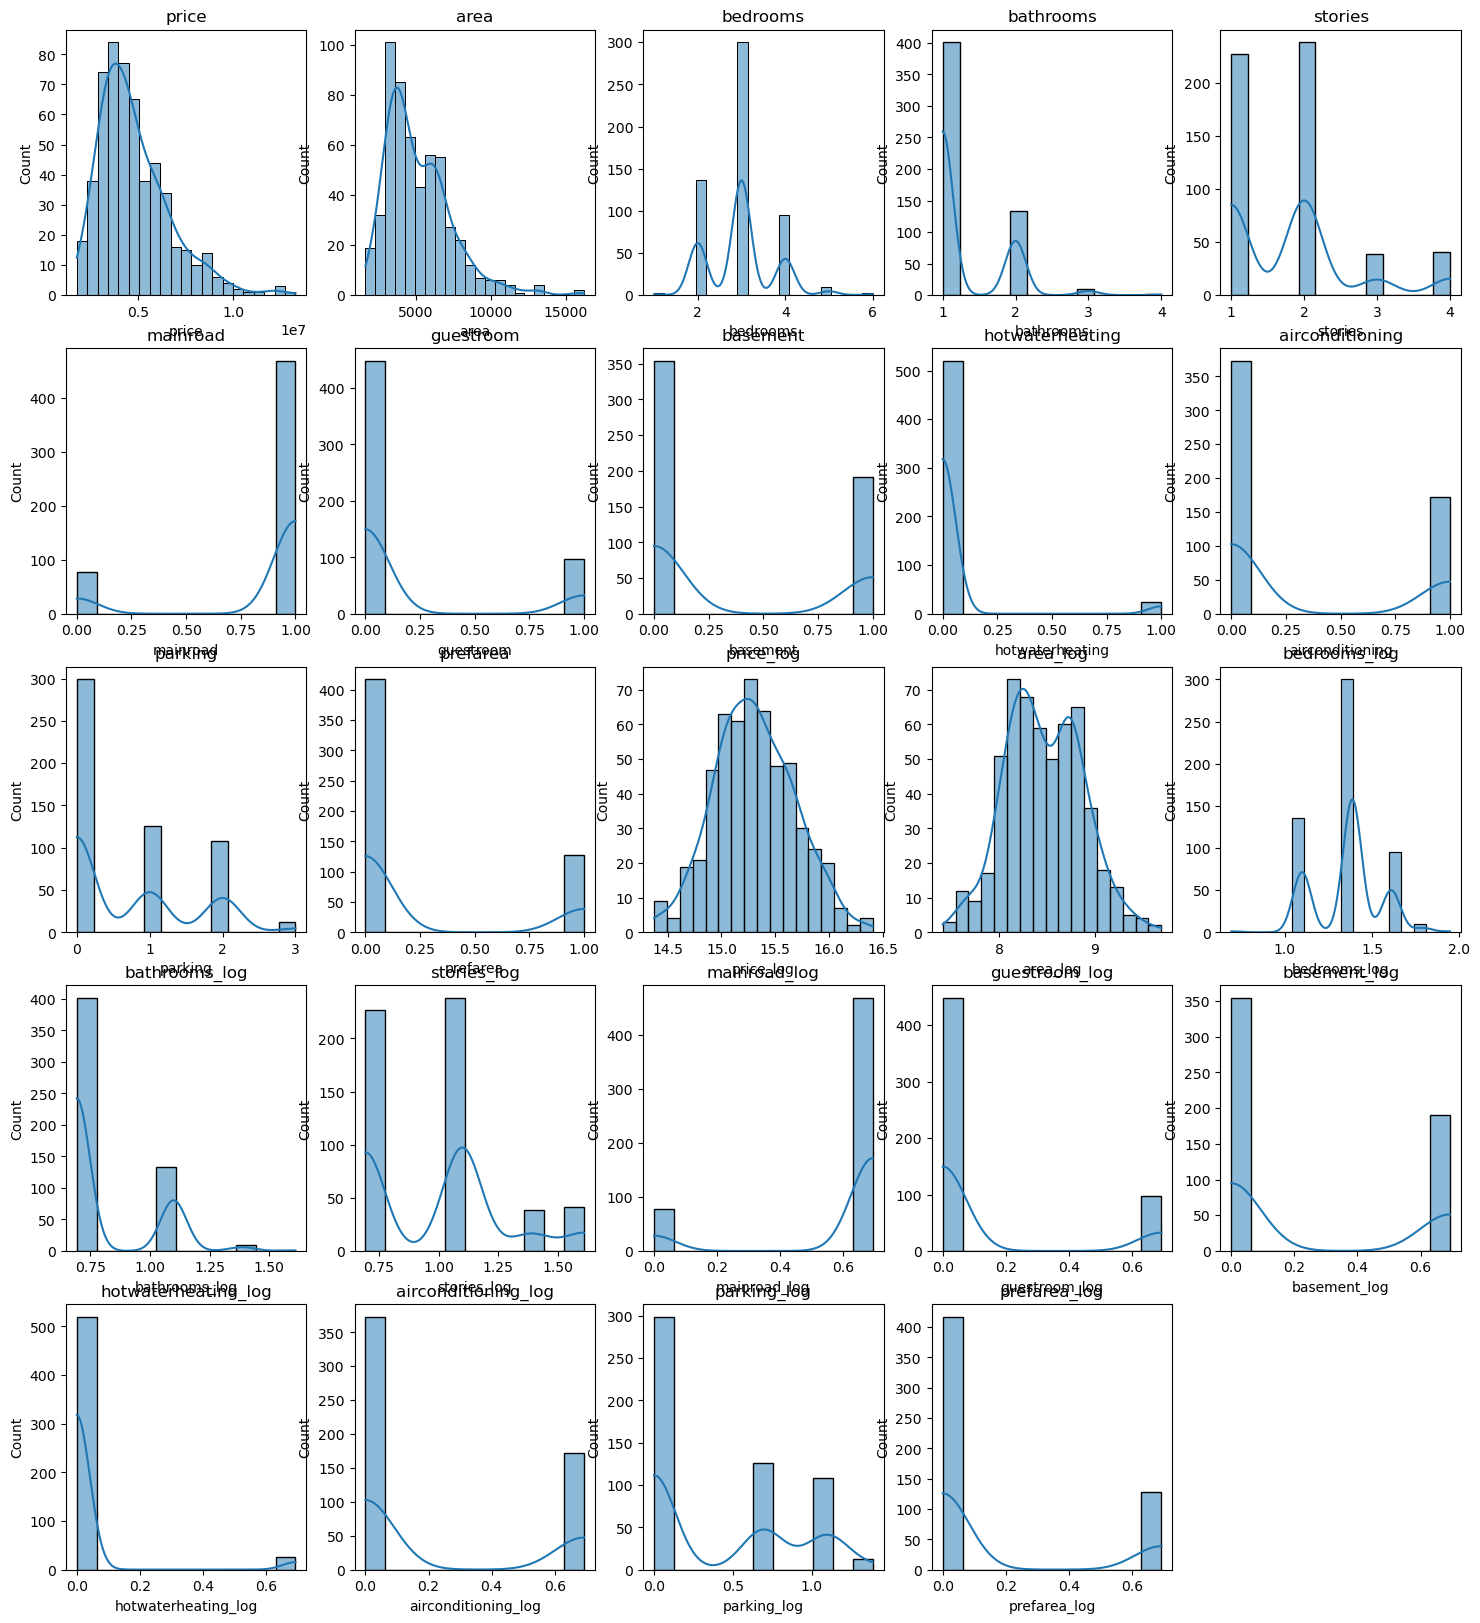

In [84]:
# Grafica exploratoria de todas las columnas numéricas (ajustado para cualquier cantidad de columnas)
numeric_cols = df2.select_dtypes(include=[np.number]).columns
n_cols = 5 # Número de columnas por fila en la gráfica
n_rows = int(np.ceil(len(numeric_cols) / n_cols))
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()  # Aplanar para fácil indexado

for i, column in enumerate(numeric_cols):
    sns.histplot(df2[column], ax=axes[i], kde=True)
    axes[i].set_title(column)

# Si hay más subplots que columnas, ocultar los ejes vacíos
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.show()

### Data Split

In [110]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [111]:
# Convertir variables categóricas en dummies
df_dummies = pd.get_dummies(df2, drop_first=True)
print("Shape después dummies:", df_dummies.shape)

Shape después dummies: (545, 26)


In [112]:
y = df_dummies["price"]
X = df_dummies.drop(columns=["price"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("{0:2f}% data is in training set".format((len(X_train)/len(df2.index))*100))
print("{0:2f}% data is in test set".format((len(X_test)/len(df2.index))*100))

69.908257% data is in training set
30.091743% data is in test set


In [113]:
num_cols = X.select_dtypes(include=np.number).columns.tolist()
scaler = StandardScaler()

# Crear transformer que escala todas las columnas (ya que son numéricas)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [115]:
# Entrenar modelo de regresión lineal}

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [117]:
# Predicciones y métricas

y_pred_train = lr.predict(X_train_scaled)
y_pred_test = lr.predict(X_test_scaled)

def print_metrics(y_true, y_pred, label="Test"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{label} MAE: {mae:.2f} | RMSE: {rmse:.2f} | R2: {r2:.4f}")

print_metrics(y_train, y_pred_train, "Train")
print_metrics(y_test, y_pred_test, "Test")



Train MAE: 237132.16 | RMSE: 349656.50 | R2: 0.9611
Test MAE: 352173.76 | RMSE: 553085.45 | R2: 0.9290


In [ ]:
# Coeficientes e importancia (lineal -> coef directo)
# Mapear coef al nombre de la feature
coefs = pd.Series(lr.coef_, index=X.columns)
coefs_sorted = coefs.sort_values(key=abs, ascending=False)
coefs_sorted.head(20)


mainroad              -2.453786e+18
mainroad_log           2.453786e+18
guestroom              5.110599e+17
guestroom_log         -5.110599e+17
prefarea               1.245665e+17
prefarea_log          -1.245665e+17
basement              -6.094016e+16
basement_log           6.094016e+16
hotwaterheating        2.086179e+16
hotwaterheating_log   -2.086179e+16
airconditioning_log    7.072636e+15
airconditioning       -7.072636e+15
price_log              1.708159e+06
bathrooms              1.330298e+06
bathrooms_log         -1.242307e+06
bedrooms_log          -4.398759e+05
bedrooms               4.121215e+05
parking                1.733576e+05
parking_log           -1.185206e+05
area_log              -9.415128e+04
dtype: float64

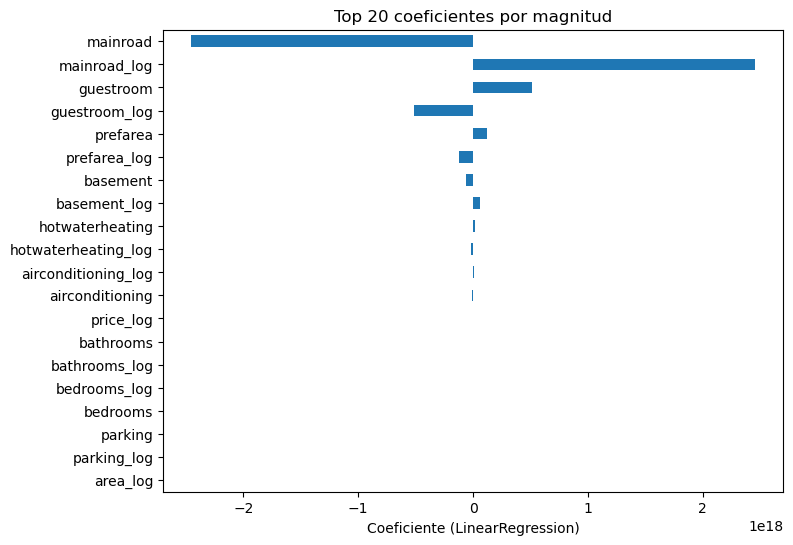

In [121]:
plt.figure(figsize=(8,6))
coefs_sorted.head(20).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top 20 coeficientes por magnitud")
plt.xlabel("Coeficiente (LinearRegression)")
plt.show()

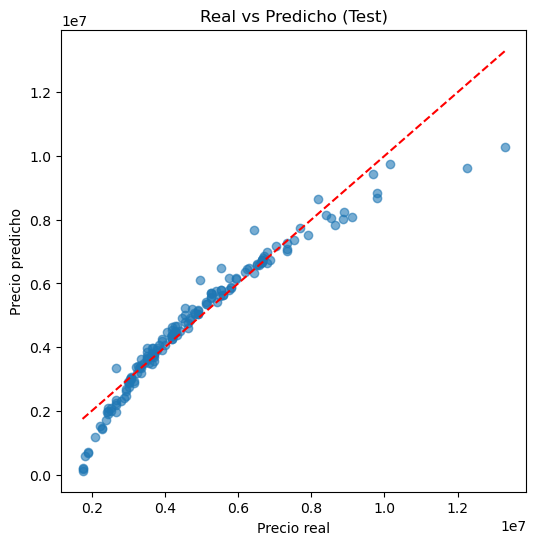

In [123]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Real vs Predicho (Test)")
plt.show()